In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
file_path = '../../data/Prac4/glass.csv'

glass_df = pd.read_csv(file_path)
glass_df.head()

,Id_Number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
glass_df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [6]:
glass_df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [7]:
X_1 = glass_df[glass_df.columns[:-1]]
y_1 = glass_df['Type']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(multi_class='multinomial', solver='sag')
logR.fit(X_train, y_train)

d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Subjects_In_University\Machine_Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [10]:
y_pred = logR.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.9444444444444444
[[23  0  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  2  5  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  6]]


<Axes: >

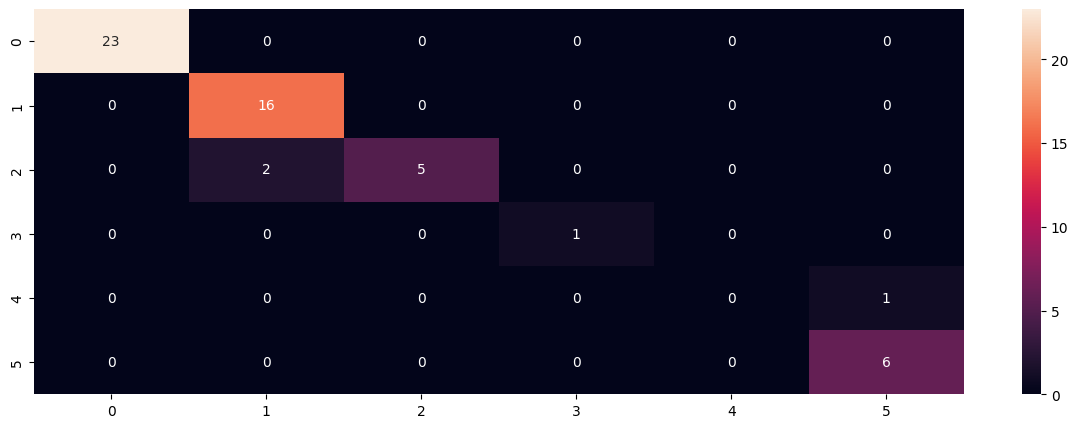

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.heatmap(cm, annot=True)